<a href="https://colab.research.google.com/github/clickratio/PS4HouseDataAlex/blob/master/Predict_House_Prices_Alex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [91]:
data = pd.read_csv('https://raw.githubusercontent.com/clickratio/PS4HouseDataAlex/master/train.csv')
data.shape
data1 =  pd.read_csv('https://raw.githubusercontent.com/clickratio/PS4HouseDataAlex/master/test.csv')


train = data.iloc[0:1000,:]
test = data1
train.to_json('housedata.json')
test.to_json('housedatatest.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [85]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

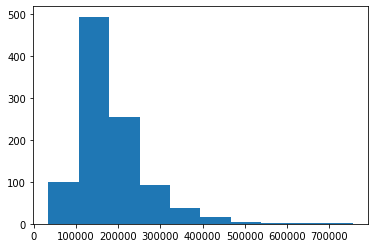

In [65]:
# plot hist
plt.hist(train['SalePrice'])

In [88]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
#numeric1=test.select_dtypes(include=[np.number])
numeric.shape
numeric.head()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [75]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols
#corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

In [99]:
# pick out X cols and Y = SalePricee
X = train[cols]
testX = test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF']]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
testX

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,3,944,2,528,0
1,5,691,1,216,691
2,8,1574,3,824,1574
3,5,1680,2,528,1680
4,7,1504,2,457,1346
...,...,...,...,...,...
455,6,1647,2,460,953
456,6,2073,2,500,1542
457,7,2340,1,252,1152
458,5,1078,1,240,1078


In [103]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
#predictions

In [78]:
# How good is the model
model.score(X,Y)


0.791111347590306

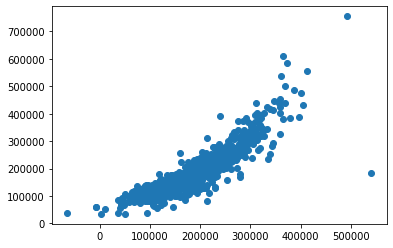

In [79]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [121]:
predictionstest = model.predict(testX)
l1 = len(predictionstest)
l1
pred_list = predictionstest.tolist()
d = {'Id': test.Id, 'PredSalePrice': pred_list}

testdf = pd.DataFrame(d)
testdf.to_csv(index=False)
testdf

,Id,PredSalePrice
0,1001,43895.257758
1,1002,84520.364883
2,1003,270307.202609
3,1004,195361.805508
4,1005,213502.999979
...,...,...
455,1456,182619.618693
456,1457,230659.638192
457,1458,234067.077531
458,1459,121478.079095
